In [1]:
import pandas as pd
import nltk
import numpy as np
data_bef_Aug_2017 = pd.read_csv("Hotel_Reviews.csv")
data_later = pd.read_csv('Novotel London Canary Wharf.csv')
# ta_data = pd.read_csv('tripadvisor.csv')

In [2]:
import string

# Clean up the date in the "Review_date"
data_later.Review_date = data_later.Review_date.apply(lambda x: x.replace('Reviewed: ',''))
data_later.head()

,Unnamed: 0,Name,Country,Room_stayed,Date_stayed,Trip_type,Review_date,Review_title,Positive,Negative,Reviewer_score
0,0,Silviu,Montenegro,Superior Double Room with City View,3 nights · July 2019,Couple,16 July 2019,Exceptional,the view from the double deluz room at 28th fl...,I added an extra day to the reservation via ph...,10.0
1,1,Marie,United Kingdom,Superior Double Room,1 night · December 2020,Couple,10 January 2021,My Novotel BirthdayTreat 🥳,I was kindly upgraded to a city view room as i...,No parking at hotel.,8.0
2,2,Karrman,United Kingdom,Superior Double Room,1 night · December 2020,Solo traveller,1 January 2021,Great hitel,Very friendly staff,Nothing,10.0
3,3,Jamal,United Kingdom,Superior Twin Room,1 night · December 2020,Couple,20 December 2020,Exceptional,Excellent,Not Available,10.0
4,4,Gregory,South Africa,Superior Double Room,6 nights · December 2020,Solo traveller,14 December 2020,Fabulous,The Facility and the staff were sonwarm,Not Available,9.0


In [3]:
data_later.describe()

,Unnamed: 0,Reviewer_score
count,3288.000000,3288.000000
mean,1643.500000,8.969830
std,949.308169,1.320366
min,0.000000,1.000000
25%,821.750000,8.300000
50%,1643.500000,9.600000
75%,2465.250000,10.000000
max,3287.000000,10.000000


In [4]:
data_later.isnull().sum()

Unnamed: 0          0
Name                0
Country             0
Room_stayed         0
Date_stayed         0
Trip_type           0
Review_date         0
Review_title        0
Positive            0
Negative          454
Reviewer_score      0
dtype: int64

Write a function to convert date strings into proper date time format

In [9]:
from datetime import datetime

def string2date(string):
    return pd.to_datetime(datetime.strptime(string, '%d %B %Y'))

data_later.Review_date = data_later.Review_date.apply(string2date)

In [10]:
data_later.head()

,Unnamed: 0,Name,Country,Room_stayed,Date_stayed,Trip_type,Review_date,Review_title,Positive,Negative,Reviewer_score
0,0,Silviu,Montenegro,Superior Double Room with City View,3 nights · July 2019,Couple,2019-07-16,Exceptional,the view from the double deluz room at 28th fl...,I added an extra day to the reservation via ph...,10.0
1,1,Marie,United Kingdom,Superior Double Room,1 night · December 2020,Couple,2021-01-10,My Novotel BirthdayTreat 🥳,I was kindly upgraded to a city view room as i...,No parking at hotel.,8.0
2,2,Karrman,United Kingdom,Superior Double Room,1 night · December 2020,Solo traveller,2021-01-01,Great hitel,Very friendly staff,Nothing,10.0
3,3,Jamal,United Kingdom,Superior Twin Room,1 night · December 2020,Couple,2020-12-20,Exceptional,Excellent,Not Available,10.0
4,4,Gregory,South Africa,Superior Double Room,6 nights · December 2020,Solo traveller,2020-12-14,Fabulous,The Facility and the staff were sonwarm,Not Available,9.0


Cleaning the scraped dataset

In [11]:
later_data_original = data_later[['Review_date', 'Country', 'Positive', 'Negative', 'Trip_type']].copy()

later_data_original['Year'] = later_data_original['Review_date'].dt.year
later_data_original.head()

,Review_date,Country,Positive,Negative,Trip_type,Year
0,2019-07-16,Montenegro,the view from the double deluz room at 28th fl...,I added an extra day to the reservation via ph...,Couple,2019
1,2021-01-10,United Kingdom,I was kindly upgraded to a city view room as i...,No parking at hotel.,Couple,2021
2,2021-01-01,United Kingdom,Very friendly staff,Nothing,Solo traveller,2021
3,2020-12-20,United Kingdom,Excellent,Not Available,Couple,2020
4,2020-12-14,South Africa,The Facility and the staff were sonwarm,Not Available,Solo traveller,2020


In [12]:
# Find out the review with the earliest date in our own scraped data (not the Kaggle-downloaded data)
np.min(later_data_original.Review_date)

Timestamp('2018-07-31 00:00:00')

In [13]:
# Find out the review with the latest date in our own scraped data
np.max(later_data_original.Review_date)

Timestamp('2021-03-09 00:00:00')

In [14]:
corrected_headers_dict = {
    'Review_date' : 'Review_Date',
    'Country' : 'Reviewer_Nationality',
    'Positive' : 'Positive_Review',
    'Negative' : 'Negative_Review',
    'Trip_type' : 'Guest_type'
}

later_data_original.rename(columns=corrected_headers_dict, inplace=True)
later_data_original.head()

,Review_Date,Reviewer_Nationality,Positive_Review,Negative_Review,Guest_type,Year
0,2019-07-16,Montenegro,the view from the double deluz room at 28th fl...,I added an extra day to the reservation via ph...,Couple,2019
1,2021-01-10,United Kingdom,I was kindly upgraded to a city view room as i...,No parking at hotel.,Couple,2021
2,2021-01-01,United Kingdom,Very friendly staff,Nothing,Solo traveller,2021
3,2020-12-20,United Kingdom,Excellent,Not Available,Couple,2020
4,2020-12-14,South Africa,The Facility and the staff were sonwarm,Not Available,Solo traveller,2020


In [15]:
later_data_original.Guest_type.value_counts()

Couple            1826
Not Available      445
Group              388
Family             323
Solo traveller     306
Name: Guest_type, dtype: int64

Filter out our chosen hotel

In [16]:
hotel_nov = data_bef_Aug_2017[data_bef_Aug_2017.Hotel_Name == 'Novotel London Canary Wharf']
hotel_nov.reset_index(inplace = True, drop = True)
hotel_nov = hotel_nov[['Review_Date', 'Reviewer_Nationality', 'Positive_Review', 'Negative_Review', 'Tags']].copy()
hotel_nov.Review_Date = pd.to_datetime(hotel_nov.Review_Date)

hotel_nov['Year'] = hotel_nov['Review_Date'].dt.year

hotel_nov.head()

,Review_Date,Reviewer_Nationality,Positive_Review,Negative_Review,Tags,Year
0,2017-08-02,United Kingdom,The hotel is easy to get to by clipper or by ...,There wasn t anything I didn t like during ou...,"[' Leisure trip ', ' Couple ', ' Superior Doub...",2017
1,2017-08-02,United Kingdom,Rooftop bar for drinks in the eve,The breakfast the staff were not attentive wh...,"[' Leisure trip ', ' Group ', ' Superior Twin ...",2017
2,2017-08-02,United Kingdom,I loved the breakfasts such a variety and qua...,I don t really want to say anything negative ...,"[' Leisure trip ', ' Couple ', ' Superior Doub...",2017
3,2017-07-25,United Kingdom,View,Sauna was not working Not information given a...,"[' Leisure trip ', ' Couple ', ' Superior Doub...",2017
4,2017-07-24,United Kingdom,breakfast good beautiful view from room,double room only has one toothbrush and one s...,"[' Leisure trip ', ' Group ', ' Deluxe Double ...",2017


In [17]:
# Creating features from the tags column
import ast
hotel_nov['Travel_type'] = hotel_nov.Tags.apply(lambda x: ast.literal_eval(x)[0])
hotel_nov['Guest_type'] = hotel_nov.Tags.apply(lambda x: ast.literal_eval(x)[1] if len(ast.literal_eval(x)) > 1 else None)
hotel_nov['Room_type'] = hotel_nov.Tags.apply(lambda x: ast.literal_eval(x)[2] if len(ast.literal_eval(x)) > 2 else None)
hotel_nov['Stay'] = hotel_nov.Tags.apply(lambda x: ast.literal_eval(x)[3] if len(ast.literal_eval(x)) > 3 else None)
hotel_nov.head()

,Review_Date,Reviewer_Nationality,Positive_Review,Negative_Review,Tags,Year,Travel_type,Guest_type,Room_type,Stay
0,2017-08-02,United Kingdom,The hotel is easy to get to by clipper or by ...,There wasn t anything I didn t like during ou...,"[' Leisure trip ', ' Couple ', ' Superior Doub...",2017,Leisure trip,Couple,Superior Double Room,Stayed 1 night
1,2017-08-02,United Kingdom,Rooftop bar for drinks in the eve,The breakfast the staff were not attentive wh...,"[' Leisure trip ', ' Group ', ' Superior Twin ...",2017,Leisure trip,Group,Superior Twin Room,Stayed 1 night
2,2017-08-02,United Kingdom,I loved the breakfasts such a variety and qua...,I don t really want to say anything negative ...,"[' Leisure trip ', ' Couple ', ' Superior Doub...",2017,Leisure trip,Couple,Superior Double Room,Stayed 2 nights
3,2017-07-25,United Kingdom,View,Sauna was not working Not information given a...,"[' Leisure trip ', ' Couple ', ' Superior Doub...",2017,Leisure trip,Couple,Superior Double Room,Stayed 1 night
4,2017-07-24,United Kingdom,breakfast good beautiful view from room,double room only has one toothbrush and one s...,"[' Leisure trip ', ' Group ', ' Deluxe Double ...",2017,Leisure trip,Group,Deluxe Double Room,Stayed 1 night


In [19]:
# Concatenate the reviews from Kaggle with the one we scraped ourselves
full_df_nov = pd.concat([hotel_nov, later_data_original], axis=0, sort=False, ignore_index=True)
full_df_nov.head()

,Review_Date,Reviewer_Nationality,Positive_Review,Negative_Review,Tags,Year,Travel_type,Guest_type,Room_type,Stay
0,2017-08-02,United Kingdom,The hotel is easy to get to by clipper or by ...,There wasn t anything I didn t like during ou...,"[' Leisure trip ', ' Couple ', ' Superior Doub...",2017,Leisure trip,Couple,Superior Double Room,Stayed 1 night
1,2017-08-02,United Kingdom,Rooftop bar for drinks in the eve,The breakfast the staff were not attentive wh...,"[' Leisure trip ', ' Group ', ' Superior Twin ...",2017,Leisure trip,Group,Superior Twin Room,Stayed 1 night
2,2017-08-02,United Kingdom,I loved the breakfasts such a variety and qua...,I don t really want to say anything negative ...,"[' Leisure trip ', ' Couple ', ' Superior Doub...",2017,Leisure trip,Couple,Superior Double Room,Stayed 2 nights
3,2017-07-25,United Kingdom,View,Sauna was not working Not information given a...,"[' Leisure trip ', ' Couple ', ' Superior Doub...",2017,Leisure trip,Couple,Superior Double Room,Stayed 1 night
4,2017-07-24,United Kingdom,breakfast good beautiful view from room,double room only has one toothbrush and one s...,"[' Leisure trip ', ' Group ', ' Deluxe Double ...",2017,Leisure trip,Group,Deluxe Double Room,Stayed 1 night


In [28]:
# Test to see that the later (self-scraped) dataset has been concatenated
full_df_nov[full_df_nov.Review_Date>'2019-08-01']

,Review_Date,Reviewer_Nationality,Positive_Review,Negative_Review,Tags,Year,Travel_type,Guest_type,Room_type,Stay
147,2021-01-10,United Kingdom,I was kindly upgraded to a city view room as i...,No parking at hotel.,NaN,2021,NaN,Couple,NaN,NaN
148,2021-01-01,United Kingdom,Very friendly staff,Nothing,NaN,2021,NaN,Solo traveller,NaN,NaN
149,2020-12-20,United Kingdom,Excellent,Not Available,NaN,2020,NaN,Couple,NaN,NaN
150,2020-12-14,South Africa,The Facility and the staff were sonwarm,Not Available,NaN,2020,NaN,Solo traveller,NaN,NaN
151,2020-12-13,Italy,Great reception! Thanks Sara. Amazing view fro...,Stains on carpet and chairs.,NaN,2020,NaN,Couple,NaN,NaN
152,2020-12-12,United Kingdom,The view was everything.,Nothing that I can think of.,NaN,2020,NaN,Group,NaN,NaN
153,2020-12-07,United Kingdom,Excellent staff- wonderful and friendly greeti...,Nothing !!,NaN,2020,NaN,Group,NaN,NaN
154,2020-12-07,United Kingdom,Good location,Not Available,NaN,2020,NaN,Couple,NaN,NaN
155,2020-12-06,United Kingdom,There was a loud party going on in one of the ...,Not Available,NaN,2020,NaN,Solo traveller,NaN,NaN
156,2020-12-06,United Kingdom,Check in and out was easy. Comfortable bed and...,Not Available,NaN,2020,NaN,Couple,NaN,NaN


In [20]:
hotel = full_df_nov.copy()

After preparing the dataset, it's time to clean the reviews.

In [21]:
hotel.isnull().sum()

Review_Date                0
Reviewer_Nationality       0
Positive_Review            0
Negative_Review          454
Tags                    3288
Year                       0
Travel_type             3288
Guest_type                 0
Room_type               3288
Stay                    3290
dtype: int64

In [22]:
for i in hotel.Positive_Review.value_counts().index:
    print(i)
# We can see that there are some words that are not really review and may skew our analyses. We clean them by
# replacing them with single letter values which will be cleaned away during our text pre-processing later. They are:
## There are no comments available for this review  
## This review is hidden because it doesn't meet our guidelines. 

There are no comments available for this review
No Positive
Everything
The view
Everything!
Breakfast
Everything was perfect
Good location
 Everything
The view was amazing
Amazing view
Breakfast was very good
View
The views
Clean
Everything was perfect!
The room was excellent with wonderful views of Canary Wharf. The room was clean, bed really comfortable and location really close to the underground station, bars and shops.
Location
The view was amazing.. and the breakfast was really fresh
Generally was very good
Liked the room, and spa area
Las vistas del hotel impresionantes sobre todo por la noche, el desayuno muy bueno y variado, el personal excelente (sobre todo las dos chicas españolas que nos atendieron en recepción), la tranquilidad de la zona donde está ubicado el hotel (que te permite descansar por la noche) y la buena conexión con el centro de la ciudad... entre otras cosas, sin duda repetiremos.
Ontbijt, fijne bedden, zwembad.
Pusryciai i kambari tragiski, kaina dviems 70sv

In [23]:
positive_rev_replace = {
    'There are no comments available for this review' : 'N',
}

hotel.Positive_Review.replace(to_replace=positive_rev_replace, inplace=True)
hotel.Positive_Review.value_counts()

N                                                                                                                                                                                                                                                                                                                                                         1469
No Positive                                                                                                                                                                                                                                                                                                                                                 13
Everything                                                                                                                                                                                                                                                                                                

Now, on to cleaning the Negative Reviews

In [24]:
hotel.Negative_Review.isnull().sum()

454

In [25]:
hotel.Negative_Review.fillna('N', inplace=True) # Fill missing values with 'N', a single-letter word, so that it can
# be cleaned away later.
hotel.Negative_Review.isnull().sum()

0

In [26]:
for item in hotel.Negative_Review.value_counts().index:
    print(item)

# Again, we need to pick out those that may skew our analyses. They are:
## Not Available
## N/a
##  N A
## Na
## 
## -
## Na
## .
##  N a
##  n a
##  Na
## ....

Not Available
N
Nothing
No Negative
Nothing.
Nothing!
nothing
N/a
Lifts
-
 Nothing
Nothing to dislike
Nothing all good
Everything was perfect
Everything was perfect!
Did not dislike anything. Would like a couple more milk sachets in the room and details of breakfast times and spa facilities noted somewhere in the room.
 double room only has one toothbrush and one slipper Shower is slippery and reminder is not easy to see Also I used debit card as deposit and staff said two or three hours I can receive refund But after two days I still not receive my refund 
 Lighting in the room
Check in was a painful experience even after calling days before as well as the day of arrival to confirm an early check in the room wasn't ready till after 3pm. Air conditioning would constantly reset to a warmer temperature and shut off during the day while your out and about. This caused stuffy and warm conditions when returning from a day and night out. Sound proof rooms are really not that sound proof. Res

In [27]:
negative_rev_replace = {
    'Not Available' : 'N',
    "N/a" : "N",
    "-" : "N",
    "Na" : "N",
    " N a" : "N",
    " n a" : "N", 
    " Na" : "N",
    "...." : "N"    
}

hotel.Negative_Review.replace(to_replace=negative_rev_replace, inplace=True)
hotel.Negative_Review.value_counts()

N                                                                                                                                                                                                                                        2401
Nothing                                                                                                                                                                                                                                    50
No Negative                                                                                                                                                                                                                                31
Nothing.                                                                                                                                                                                                                                    9
Nothing!                                        

In [28]:
hotel.isnull().sum()
# All nulls for the positive and negative reviews have been treated. Now we can build WordCloud.

Review_Date                0
Reviewer_Nationality       0
Positive_Review            0
Negative_Review            0
Tags                    3288
Year                       0
Travel_type             3288
Guest_type                 0
Room_type               3288
Stay                    3290
dtype: int64

Now, we use this notebook to generate WordClouds for just the Britannia Hotel. We use separate notebooks to generate WordClouds for the other 2 competitor hotels.

# Features add-on

Transform reviews into corpus

In [29]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
stop_english = stopwords.words('english')
hotel['clean_positive_review'] = hotel['Positive_Review'].apply(lambda x: list(x.split(' ')))
# Remove stop words and single character
hotel['clean_positive_review'] = hotel['clean_positive_review'].apply(lambda x: [w.lower() for w in x if w.lower() not in stop_english and len(w) >=2])
# positive_review Normalization: [am, is, are] -> be
hotel['stemed_clean_positive_review'] = hotel['clean_positive_review'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])
# Only stop word removal
final_corpus_positive = hotel['clean_positive_review'].tolist()
# Stop word removal and words stem
stemed_final_corpus_positive = hotel['stemed_clean_positive_review'].tolist()

In [30]:
hotel['clean_negative_review'] = hotel['Negative_Review'].apply(lambda x: list(x.split(' ')))
# Remove stop words and single character
hotel['clean_negative_review'] = hotel['clean_negative_review'].apply(lambda x: [w.lower() for w in x if w.lower() not in stop_english and len(w) >=2])
# negative_review Normalization: [am, is, are] -> be
hotel['stemed_clean_negative_review'] = hotel['clean_negative_review'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])
# Only stop word removal
final_corpus_negative = hotel['clean_negative_review'].tolist()
# Stop word removal and words stem
stemed_final_corpus_negative = hotel['stemed_clean_negative_review'].tolist()

In [31]:
hotel.head(5)

,Review_Date,Reviewer_Nationality,Positive_Review,Negative_Review,Tags,Year,Travel_type,Guest_type,Room_type,Stay,clean_positive_review,stemed_clean_positive_review,clean_negative_review,stemed_clean_negative_review
0,2017-08-02,United Kingdom,The hotel is easy to get to by clipper or by ...,There wasn t anything I didn t like during ou...,"[' Leisure trip ', ' Couple ', ' Superior Doub...",2017,Leisure trip,Couple,Superior Double Room,Stayed 1 night,"[hotel, easy, get, clipper, tube, dlr, really,...","[hotel, easy, get, clipper, tube, dlr, really,...","[anything, like, stay, sure, would, stay, cana...","[anything, like, stay, sure, would, stay, cana..."
1,2017-08-02,United Kingdom,Rooftop bar for drinks in the eve,The breakfast the staff were not attentive wh...,"[' Leisure trip ', ' Group ', ' Superior Twin ...",2017,Leisure trip,Group,Superior Twin Room,Stayed 1 night,"[rooftop, bar, drinks, eve]","[rooftop, bar, drink, eve]","[breakfast, staff, attentive, items, ran, seat...","[breakfast, staff, attentive, item, ran, seat,..."
2,2017-08-02,United Kingdom,I loved the breakfasts such a variety and qua...,I don t really want to say anything negative ...,"[' Leisure trip ', ' Couple ', ' Superior Doub...",2017,Leisure trip,Couple,Superior Double Room,Stayed 2 nights,"[loved, breakfasts, variety, quality, ingredie...","[loved, breakfast, variety, quality, ingredien...","[really, want, say, anything, negative, really...","[really, want, say, anything, negative, really..."
3,2017-07-25,United Kingdom,View,Sauna was not working Not information given a...,"[' Leisure trip ', ' Couple ', ' Superior Doub...",2017,Leisure trip,Couple,Superior Double Room,Stayed 1 night,[view],[view],"[sauna, working, information, given, hotel, mu...","[sauna, working, information, given, hotel, mu..."
4,2017-07-24,United Kingdom,breakfast good beautiful view from room,double room only has one toothbrush and one s...,"[' Leisure trip ', ' Group ', ' Deluxe Double ...",2017,Leisure trip,Group,Deluxe Double Room,Stayed 1 night,"[breakfast, good, beautiful, view, room]","[breakfast, good, beautiful, view, room]","[double, room, one, toothbrush, one, slipper, ...","[double, room, one, toothbrush, one, slipper, ..."


In [32]:
hotel.Year.value_counts()

2019    1871
2018     815
2020     594
2017     146
2021       8
Name: Year, dtype: int64

In [33]:
hotel.Reviewer_Nationality.value_counts()
# We have to treat "United Kingdom" and " United Kingdom" by merging them.

United Kingdom      1991
Germany              144
France               143
 United Kingdom      120
Italy                117
                    ... 
Vietnam                1
Uganda                 1
Oman                   1
 Finland               1
 Romania               1
Name: Reviewer_Nationality, Length: 100, dtype: int64

In [34]:
nationality_replace = {
    " United Kingdom " : "United Kingdom"
}

hotel.Reviewer_Nationality.replace(to_replace=nationality_replace, inplace=True)
hotel.Reviewer_Nationality.value_counts()

United Kingdom    2111
Germany            144
France             143
Italy              117
Netherlands        104
                  ... 
Vietnam              1
Uganda               1
Oman                 1
 Finland             1
 Romania             1
Name: Reviewer_Nationality, Length: 99, dtype: int64

In [35]:
hotel

,Review_Date,Reviewer_Nationality,Positive_Review,Negative_Review,Tags,Year,Travel_type,Guest_type,Room_type,Stay,clean_positive_review,stemed_clean_positive_review,clean_negative_review,stemed_clean_negative_review
0,2017-08-02,United Kingdom,The hotel is easy to get to by clipper or by ...,There wasn t anything I didn t like during ou...,"[' Leisure trip ', ' Couple ', ' Superior Doub...",2017,Leisure trip,Couple,Superior Double Room,Stayed 1 night,"[hotel, easy, get, clipper, tube, dlr, really,...","[hotel, easy, get, clipper, tube, dlr, really,...","[anything, like, stay, sure, would, stay, cana...","[anything, like, stay, sure, would, stay, cana..."
1,2017-08-02,United Kingdom,Rooftop bar for drinks in the eve,The breakfast the staff were not attentive wh...,"[' Leisure trip ', ' Group ', ' Superior Twin ...",2017,Leisure trip,Group,Superior Twin Room,Stayed 1 night,"[rooftop, bar, drinks, eve]","[rooftop, bar, drink, eve]","[breakfast, staff, attentive, items, ran, seat...","[breakfast, staff, attentive, item, ran, seat,..."
2,2017-08-02,United Kingdom,I loved the breakfasts such a variety and qua...,I don t really want to say anything negative ...,"[' Leisure trip ', ' Couple ', ' Superior Doub...",2017,Leisure trip,Couple,Superior Double Room,Stayed 2 nights,"[loved, breakfasts, variety, quality, ingredie...","[loved, breakfast, variety, quality, ingredien...","[really, want, say, anything, negative, really...","[really, want, say, anything, negative, really..."
3,2017-07-25,United Kingdom,View,Sauna was not working Not information given a...,"[' Leisure trip ', ' Couple ', ' Superior Doub...",2017,Leisure trip,Couple,Superior Double Room,Stayed 1 night,[view],[view],"[sauna, working, information, given, hotel, mu...","[sauna, working, information, given, hotel, mu..."
4,2017-07-24,United Kingdom,breakfast good beautiful view from room,double room only has one toothbrush and one s...,"[' Leisure trip ', ' Group ', ' Deluxe Double ...",2017,Leisure trip,Group,Deluxe Double Room,Stayed 1 night,"[breakfast, good, beautiful, view, room]","[breakfast, good, beautiful, view, room]","[double, room, one, toothbrush, one, slipper, ...","[double, room, one, toothbrush, one, slipper, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3429,2018-09-19,France,N,N,NaN,2018,NaN,Not Available,NaN,NaN,[],[],[],[]
3430,2019-12-05,Morocco,N,N,NaN,2019,NaN,Not Available,NaN,NaN,[],[],[],[]
3431,2019-09-30,Switzerland,N,N,NaN,2019,NaN,Not Available,NaN,NaN,[],[],[],[]
3432,2018-11-20,Italy,N,N,NaN,2018,NaN,Not Available,NaN,NaN,[],[],[],[]


# Simple WordCloud

In [36]:
from collections import Counter
# How many high frequent words are selected
N_top = 5
# store the high frequent words 
top_nwords = []
# check each report 
for final_doc in final_corpus_negative:
    c_doc = Counter(final_doc)
    # obtain top N_top words
    top_words = c_doc.most_common(N_top)
    # a list of tuple
    print(top_words)
    # the first element in tuple is the word
    t_nwords = [w[0] for w in top_words]
    # concatenate the list, e.g., [a,b,c] + [d,a] = [a,b,c,d,a]
    top_nwords = top_nwords + t_nwords
    
# This part is for testing only

[('stay', 3), ('anything', 1), ('like', 1), ('sure', 1), ('would', 1)]
[('breakfast', 1), ('staff', 1), ('attentive', 1), ('items', 1), ('ran', 1)]
[('really', 2), ('room', 2), ('want', 1), ('say', 1), ('anything', 1)]
[('hotel', 2), ('sauna', 1), ('working', 1), ('information', 1), ('given', 1)]
[('one', 2), ('two', 2), ('receive', 2), ('refund', 2), ('double', 1)]
[('terrace', 3), ('us', 3), ('man', 2), ('let', 2), ('went', 2)]
[('honestly', 1), ('know', 1), ('guess', 1), ('thing', 1), ('like', 1)]
[('time', 2), ('nothing', 1), ('unlikeable', 1), ('like', 1), ('enough', 1)]
[('one', 1), ('gripe', 1), ('got', 1), ('sorted', 1), ('promptly', 1)]
[('hotel', 2), ('lot', 1), ('construction', 1), ('area', 1), ('bit', 1)]
[('room', 2), ('pool', 1), ('could', 1), ('warmer', 1), ('conditioner', 1)]
[('room', 3), ('landmark', 3), ('views', 3), ('executive', 2), ('open', 2)]
[('staff', 2), ('toilet', 2), ('glass', 2), ('girlfriend', 2), ('inform', 1)]
[('would', 1), ('liked', 1), ('mirror', 1),

[]
[('quite', 2), ('explain', 1), ('partners', 1), ('birthday.', 1), ('went', 1)]
[]
[('coming', 2), ('room708', 1), ('bed', 1), ('mattress', 1), ('topper', 1)]
[('parking!', 1)]
[('limited', 2), ('lumpy', 1), ('bed\r\nshower', 1), ('door', 1), ('closing', 1)]
[]
[('cleaning', 1), ('staff', 1), ('inefficient.', 1), ('didn’t', 1), ('come', 1)]
[('queues', 3), ('long', 2), ('check-in,', 1), ('lifts,', 1), ('breakfast', 1)]
[('staff', 1), ('super', 1), ('unfriendly!', 1), ('breakfast', 1), ('worst', 1)]
[('poor', 2), ('remind', 1), ('ask', 1), ('twice', 1), ('tea', 1)]
[('breakfast', 2), ('woken', 2), ('9am', 2), ('window', 2), ('mattress', 2)]
[]
[]
[('get', 2), ('direct', 1), ('resturants', 1), ('bars', 1), ('room', 1)]
[('first', 1), ('room', 1), ('allocated', 1), ('smelt', 1), ('drains', 1)]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

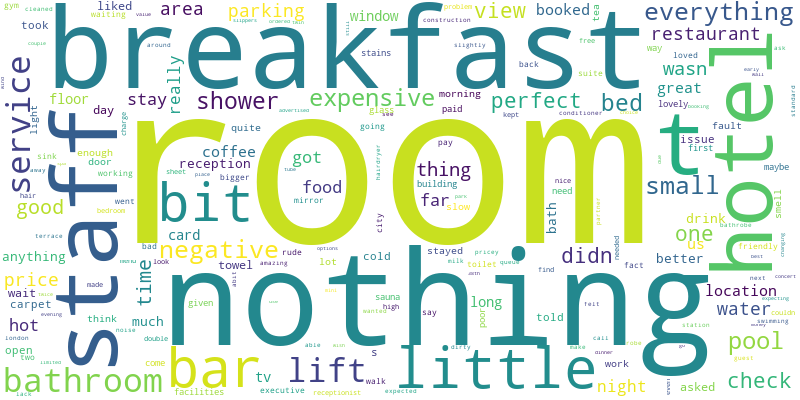

In [37]:
# Import the wordcloud library
import wordcloud

# Join the different processed titles together.
long_string = " ".join(top_nwords)

# Create a WordCloud object
wcloud = wordcloud.WordCloud(background_color='white', collocations = False, width=800, height=400)

# Generate a word cloud
wcloud.generate(long_string)

# Visualize the word cloud
wcloud.to_image()

# This part is for testing only

Wordcloud function

In [38]:
def wc(tive, column = None, value = None):
    if column == None and value == None:
        data = hotel.copy()       
    else:
        data = hotel[hotel[column] == value]
    corpus = data['stemed_clean_' + tive + '_review'].tolist()
    N_top = 5
    # store the high frequent words 
    top_nwords = []
    # check each report 
    for final_doc in corpus:
        c_doc = Counter(final_doc)
        # obtain top N_top words
        top_words = c_doc.most_common(N_top)
        # the first element in tuple is the word
        t_nwords = [w[0] for w in top_words]
        # concatenate the list, e.g., [a,b,c] + [d,a] = [a,b,c,d,a]
        top_nwords = top_nwords + t_nwords
    
    # Join the different processed titles together.
    long_string = " ".join(top_nwords)

    # Create a WordCloud object
    wcloud = wordcloud.WordCloud(background_color='white', width=800, height=400)

    # Generate a word cloud
    wcloud.generate(long_string)

    # Visualize the word cloud
    return wcloud.to_image()

# Wordcloud with parts of speech (N,V, ADJ...) separated and could ignore words if required

In [39]:
tagged_final_corpus_positive = [nltk.pos_tag(i, tagset = 'universal') for i in final_corpus_positive]
tagged_final_corpus_negative = [nltk.pos_tag(i, tagset = 'universal') for i in final_corpus_negative]

In [40]:
tagged_final_corpus_positive[0:5]

[[('hotel', 'NOUN'),
  ('easy', 'ADJ'),
  ('get', 'VERB'),
  ('clipper', 'ADJ'),
  ('tube', 'NOUN'),
  ('dlr', 'NOUN'),
  ('really', 'ADV'),
  ('clean', 'ADJ'),
  ('classy', 'ADJ'),
  ('staff', 'NOUN'),
  ('brilliant', 'ADJ'),
  ('super', 'ADJ'),
  ('efficient', 'NOUN'),
  ('helpful', 'NOUN'),
  ('facilities', 'NOUN'),
  ('offer', 'VERB'),
  ('good', 'ADJ'),
  ('rooms', 'NOUN'),
  ('bar', 'NOUN'),
  ('restaurant', 'NOUN'),
  ('excellent', 'ADJ'),
  ('views', 'NOUN'),
  ('london', 'VERB'),
  ('never', 'ADV'),
  ('stayed', 'VERB'),
  ('quiet', 'ADJ'),
  ('room', 'NOUN'),
  ('bed', 'VERB'),
  ('comfortable', 'ADJ'),
  ('unfortunately', 'ADV'),
  ('ride', 'VERB'),
  ('london', 'ADV'),
  ('100', 'NUM'),
  ('time', 'NOUN'),
  ('use', 'NOUN'),
  ('pool', 'NOUN'),
  ('leave', 'VERB'),
  ('early', 'ADJ'),
  ('morning', 'NOUN'),
  ('45am', 'NUM'),
  ('get', 'NOUN'),
  ('make', 'ADJ'),
  ('hotel', 'NOUN'),
  ('offer', 'NOUN'),
  ('room', 'NOUN'),
  ('rate', 'NOUN'),
  ('include', 'VERB'),
  ('bre

In [41]:
#pos list https://github.com/nltk/nltk/blob/develop/nltk/tag/mapping.py
#return a list of only the selected parts of speech
#Eg get_tag(tagged_final_corpus_positive,'NOUN',ignore = 'room')
def get_tag(tagged_list,pos = False ,ignore = False):
    if not pos:
        if not ignore:
            for i in range(len(tagged_list)):
                tagged_list[i] = [j[0] for j in tagged_list[i]]
        else:
            for i in range(len(tagged_list)):
                tagged_list[i] = [j[0] for j in tagged_list[i] if j[0] not in ignore]
    else:
        if not ignore:
            for i in range(len(tagged_list)):
                tagged_list[i] = [j[0] for j in tagged_list[i] if j[1] == pos]
        else:
            for i in range(len(tagged_list)):
                tagged_list[i] = [j[0] for j in tagged_list[i] if j[1] == pos and j[0] not in ignore]
    return [i for i in tagged_list if i != []]

In [42]:
#this is for convenience. For specific selection might be faster to select.
def wc(tive, column = None, value = None, pos = False, ignore = False):
    if column == None and value == None:
        data = hotel.copy()       
    else:
        data = hotel[hotel[column] == value]
    #this is for convenience. For specific selection might be faster to select.
def wc(tive, column = None, value = None, pos = False, ignore = False):
    if column == None and value == None:
        data = hotel.copy()       
    else:
        data = hotel[hotel[column] == value]
    print(f'Sample size: {len(data)}') # Print out the sample size to get a sense of how many samples
    corpus = data['stemed_clean_' + tive + '_review'].tolist()
    corpus = [nltk.pos_tag(i, tagset = 'universal') for i in corpus]
    corpus = get_tag(corpus,pos = pos,ignore = ignore)
    N_top = 5
    # store the high frequent words 
    top_nwords = []
    # check each report 
    for final_doc in corpus:
        c_doc = Counter(final_doc)
        # obtain top N_top words
        top_words = c_doc.most_common(N_top)
        # the first element in tuple is the word
        t_nwords = [w[0] for w in top_words]
        # concatenate the list, e.g., [a,b,c] + [d,a] = [a,b,c,d,a]
        top_nwords = top_nwords + t_nwords
    
    # Join the different processed titles together.
    long_string = " ".join(top_nwords)

    # Create a WordCloud object
    wcloud = wordcloud.WordCloud(background_color='white', width=800, height=400)

    # Generate a word cloud
    wcloud.generate(long_string)

    # Visualize the word cloud
    return wcloud.to_image()
    corpus = data['stemed_clean_' + tive + '_review'].tolist()
    corpus = [nltk.pos_tag(i, tagset = 'universal') for i in corpus]
    corpus = get_tag(corpus,pos = pos,ignore = ignore)
    N_top = 5
    # store the high frequent words 
    top_nwords = []
    # check each report 
    for final_doc in corpus:
        c_doc = Counter(final_doc)
        # obtain top N_top words
        top_words = c_doc.most_common(N_top)
        # the first element in tuple is the word
        t_nwords = [w[0] for w in top_words]
        # concatenate the list, e.g., [a,b,c] + [d,a] = [a,b,c,d,a]
        top_nwords = top_nwords + t_nwords
    
    # Join the different processed titles together.
    long_string = " ".join(top_nwords)

    # Create a WordCloud object
    wcloud = wordcloud.WordCloud(background_color='white', width=800, height=400)

    # Generate a word cloud
    wcloud.generate(long_string)

    # Visualize the word cloud
    return wcloud.to_image()

Sample size: 3434


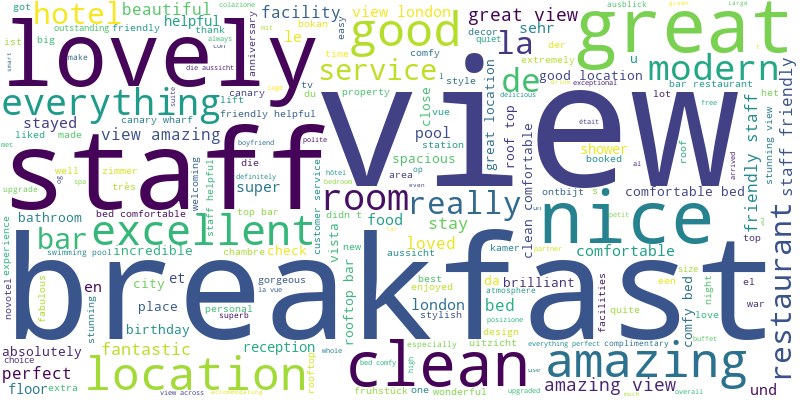

In [43]:
wc('positive', ignore = ['hotel', 'room', 'positive', 'negative'])

Sample size: 3434


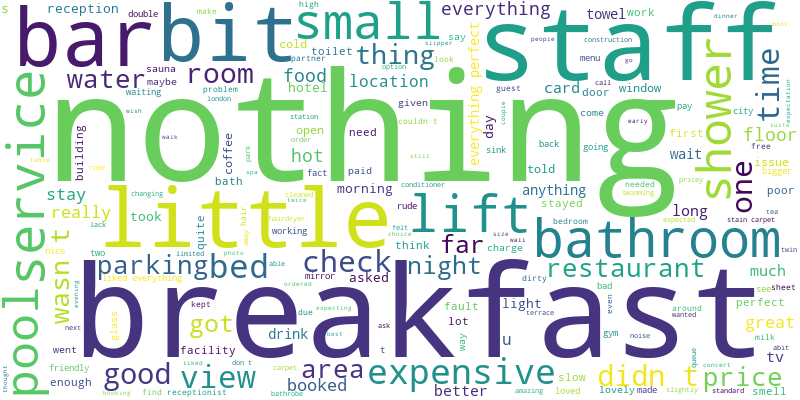

In [45]:
wc('negative', ignore = ['hotel', 'room', 'positive', 'negative'])

In [1]:
# End